In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
death_path = Path("death_table.csv")
emissions_path = Path("emissions_table.csv")
death_df = pd.read_csv(death_path)
emissions_df = pd.read_csv(emissions_path)

In [14]:
death_df = death_df.sort_values(by=['area'])
death_df

,area,year,deaths_caused_by_outdoor_air_pollution,deaths_caused_by_household_pollution_from_solid_fuels,deaths_caused_by_air_pollution
91,Afghanistan,2014,7817,31296,38711
85,Afghanistan,2008,4767,38320,42696
77,Afghanistan,2000,4021,45132,48763
78,Afghanistan,2001,4014,45028,48660
79,Afghanistan,2002,3961,44137,47732
...,...,...,...,...,...
2203,Sweden,2018,769,3,770
2204,Sweden,2019,757,3,758
2195,Sweden,2010,1403,6,1403
2196,Sweden,2011,1346,6,1346


In [53]:
emissions_df = emissions_df.sort_values(by=['area'])
sort = emissions_df.loc[emissions_df['emission_type'] == 'Emissions (CO2)']
sort

,area,item,emission_type,unit,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,emissions_key
38820,Afghanistan,All sectors without LULUCF,Emissions (CO2),kilotons,914.0000,945.0000,1226.0000,1357.0000,1066.0000,1489.0000,...,10564.0000,8801.0000,8100.0000,8184.0000,7040.0000,8201.0000,8686.0000,9476.0000,9438.0000,38806
294,Afghanistan,Food Household Consumption,Emissions (CO2),kilotons,12.0750,13.4863,18.3789,21.3559,41.9606,52.9640,...,292.3777,317.3458,344.9223,332.1633,411.5902,458.7671,447.2549,441.2589,437.8905,287
300,Afghanistan,Food Transport,Emissions (CO2),kilotons,13.7445,12.9455,10.4490,15.2185,13.9375,22.3620,...,400.3100,252.3750,186.5800,258.1300,170.8975,233.2650,240.1650,269.5374,267.4799,299
288,Afghanistan,Food Retail,Emissions (CO2),kilotons,1.0471,1.2204,1.5622,1.8986,2.1116,2.1355,...,11.8433,10.5178,14.0476,14.1459,13.5695,13.9761,14.6553,11.7543,11.6646,275
154153,Afghanistan,LULUCF,Emissions (CO2),kilotons,-2388.8030,121.9016,121.9016,121.9016,121.9016,121.9016,...,-246.2191,-246.2191,-246.2191,-246.2191,154.6574,154.6574,154.6574,154.6574,154.6574,154121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19546,Sweden,Drained organic soils (CO2),Emissions (CO2),kilotons,7231.4595,7248.0820,7268.6561,7339.8279,7496.4927,7697.8233,...,8641.3347,8654.9480,8742.7297,8758.9728,8864.9295,9006.1678,9491.3842,9782.3317,9812.2760,19704
185487,Sweden,Drained organic soils (CO2),Emissions (CO2),kilotons,7231.4595,7248.0820,7268.6561,7339.8279,7496.4927,7697.8233,...,8641.3347,8654.9480,8742.7297,8758.9728,8864.9295,9006.1678,9491.3842,9782.3317,9812.2760,185714
96449,Sweden,Drained organic soils (CO2),Emissions (CO2),kilotons,7231.4595,7248.0820,7268.6561,7339.8279,7496.4927,7697.8233,...,8641.3347,8654.9480,8742.7297,8758.9728,8864.9295,9006.1678,9491.3842,9782.3317,9812.2760,96367
134561,Sweden,Drained organic soils (CO2),Emissions (CO2),kilotons,7231.4595,7248.0820,7268.6561,7339.8279,7496.4927,7697.8233,...,8641.3347,8654.9480,8742.7297,8758.9728,8864.9295,9006.1678,9491.3842,9782.3317,9812.2760,134542


(array([1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. ,
        2017.5, 2020. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

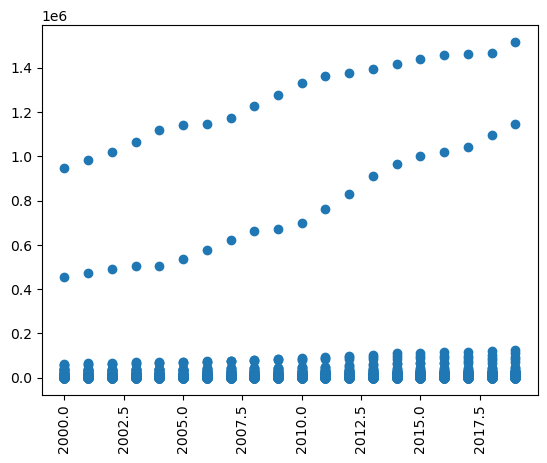

In [57]:
import numpy as np
plt.scatter(death_df.year, death_df.deaths_caused_by_outdoor_air_pollution)
plt.xticks(rotation=90)